# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Data set yang saya gunakan sudah sesuai rekomendasi dan tidak memliiki label sumber kaggle (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [332]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [333]:
df = pd.read_csv("marketing_campaign.csv",delimiter=",", encoding="utf-8")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases 

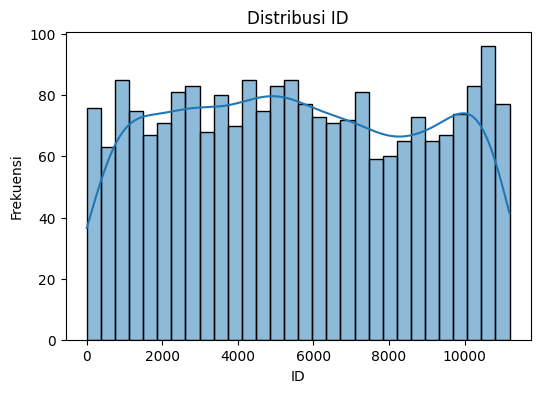

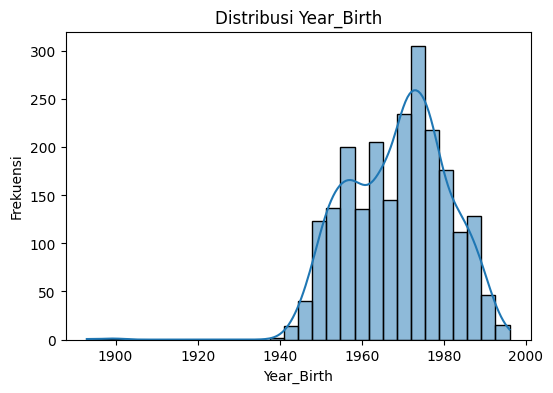

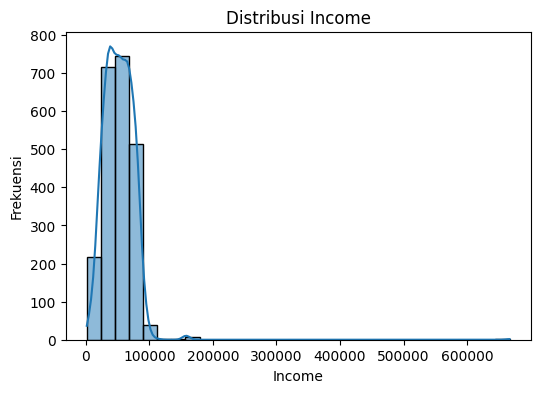

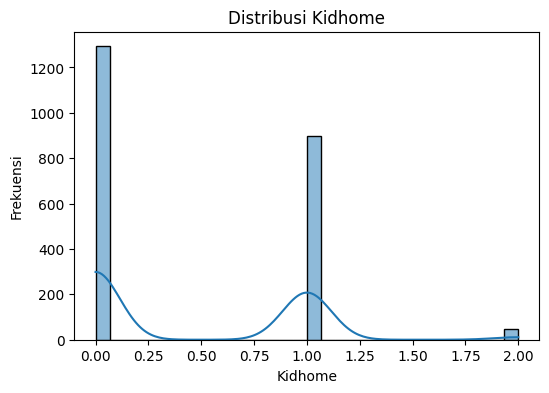

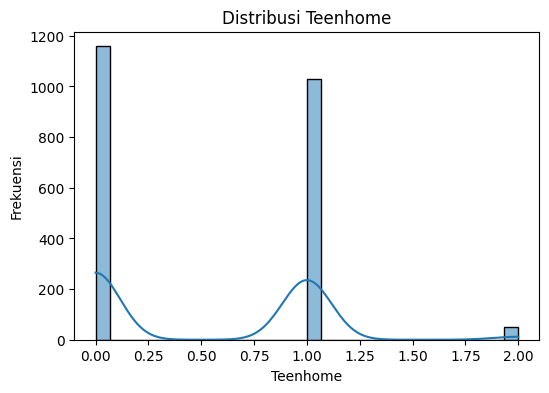

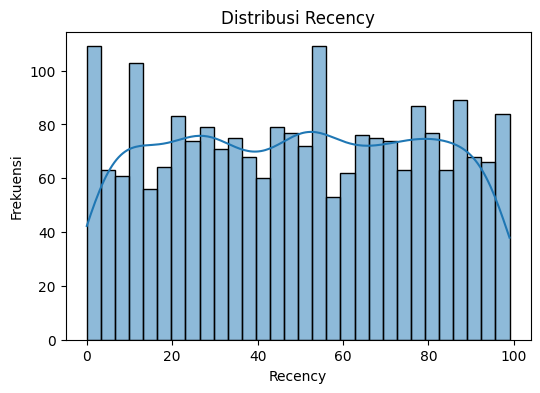

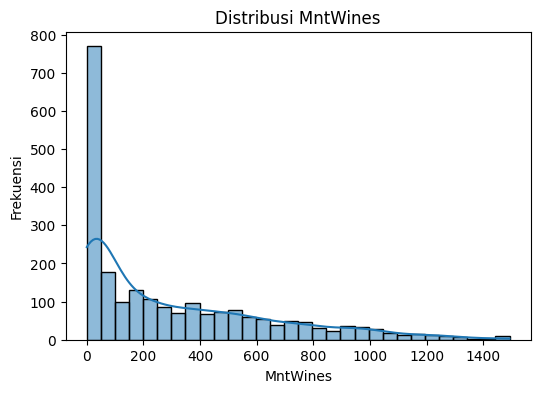

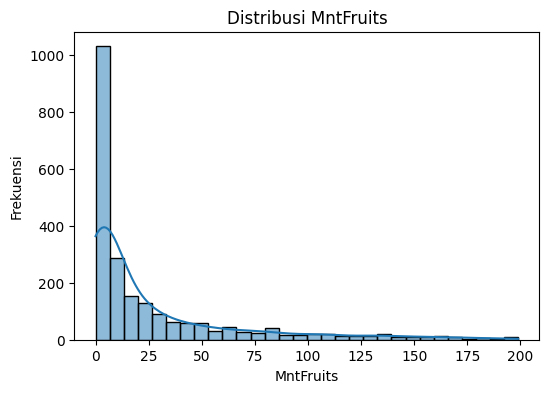

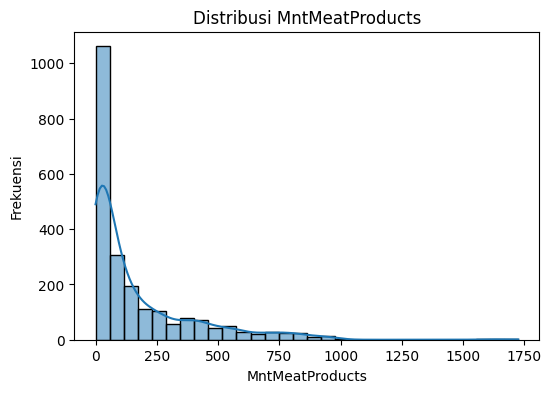

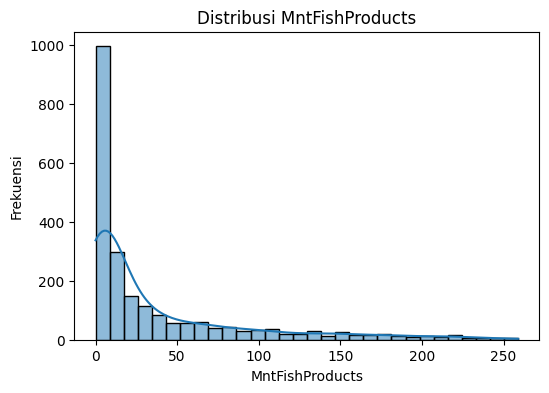

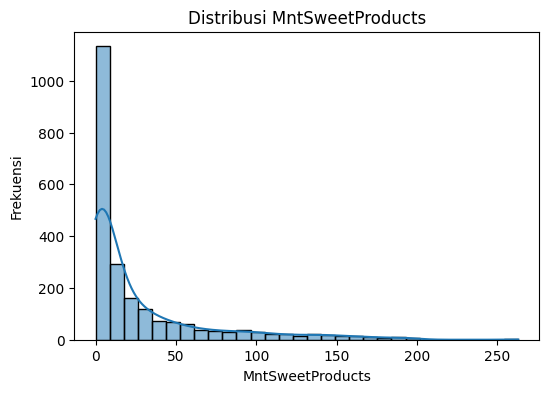

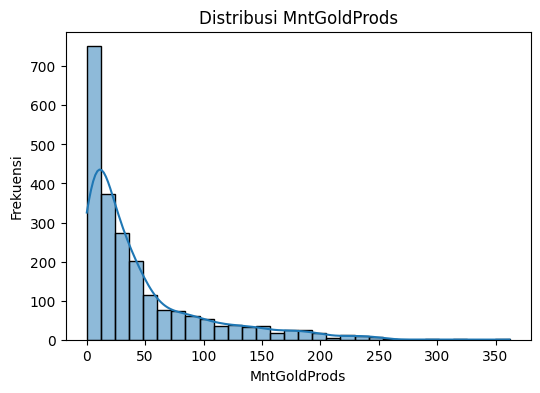

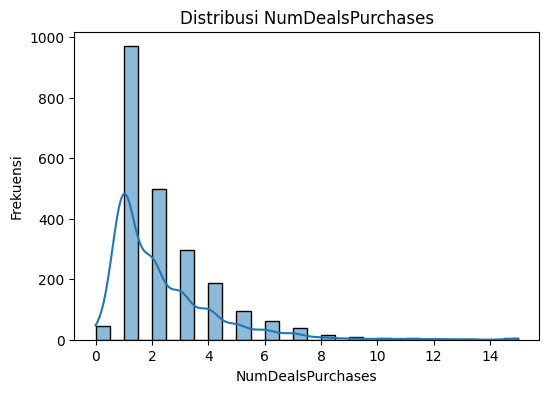

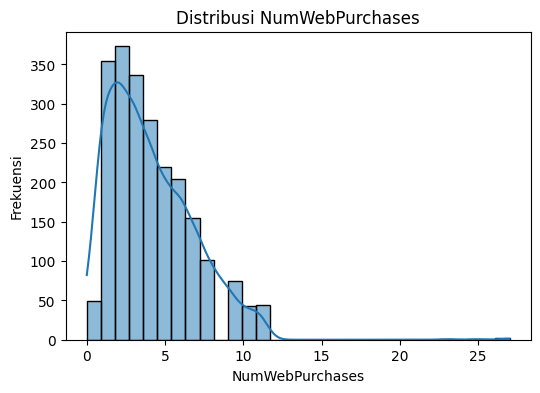

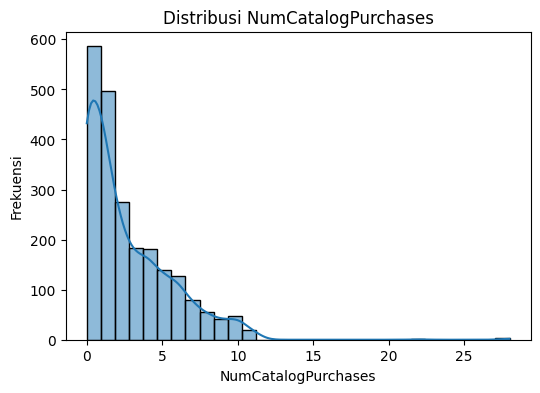

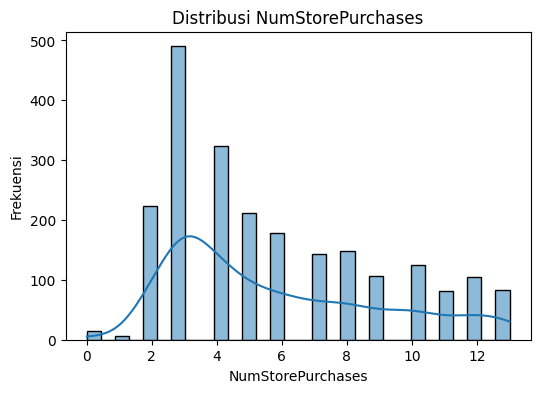

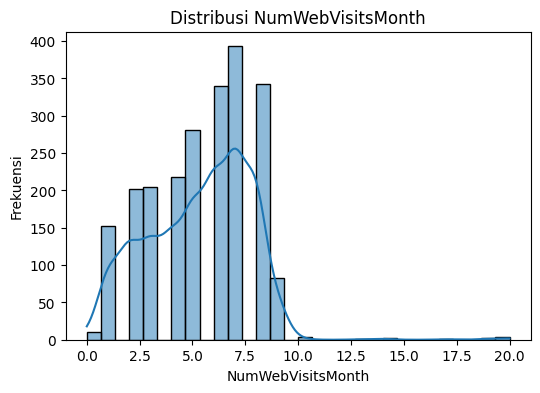

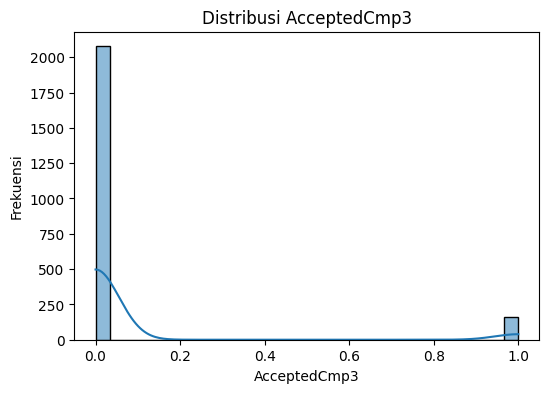

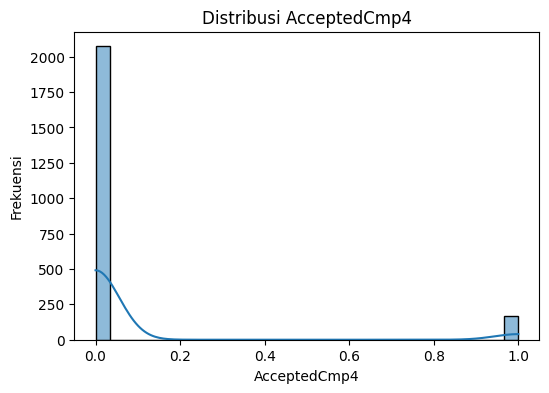

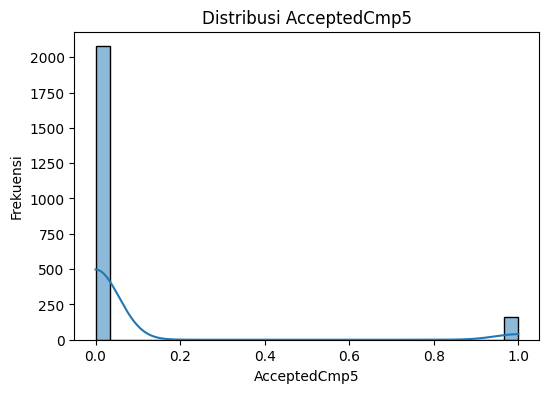

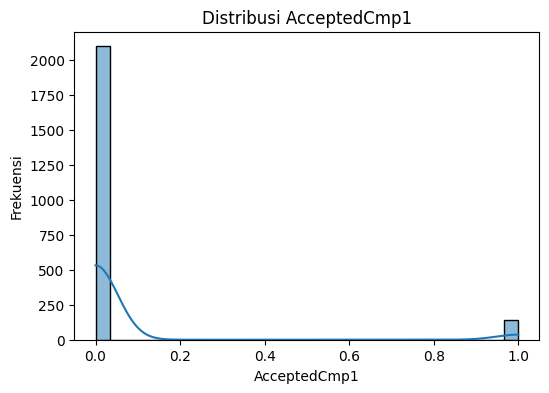

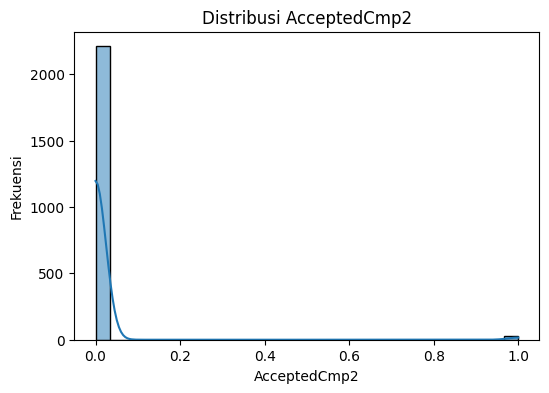

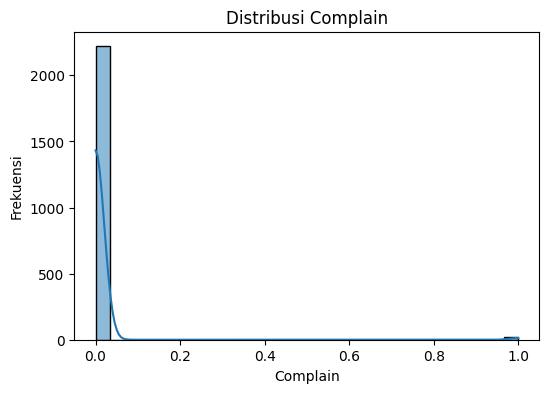

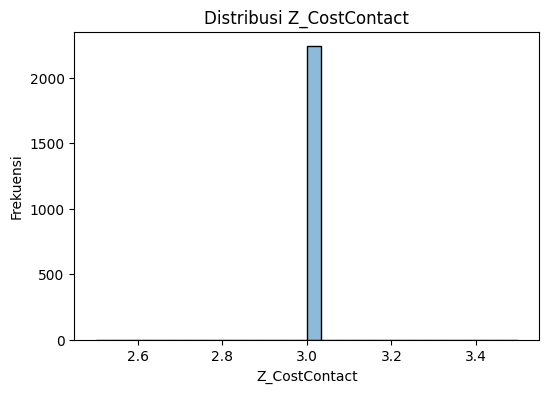

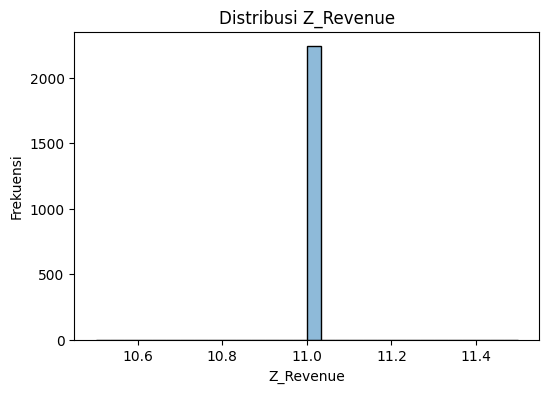

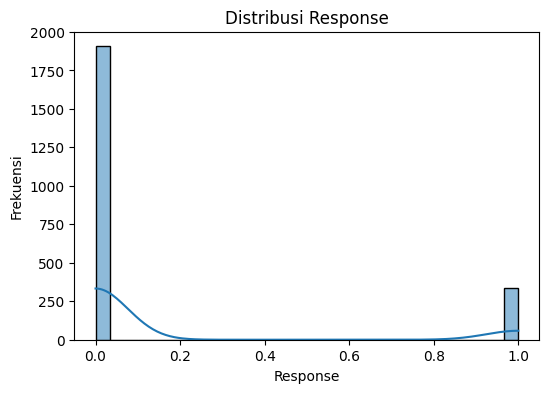

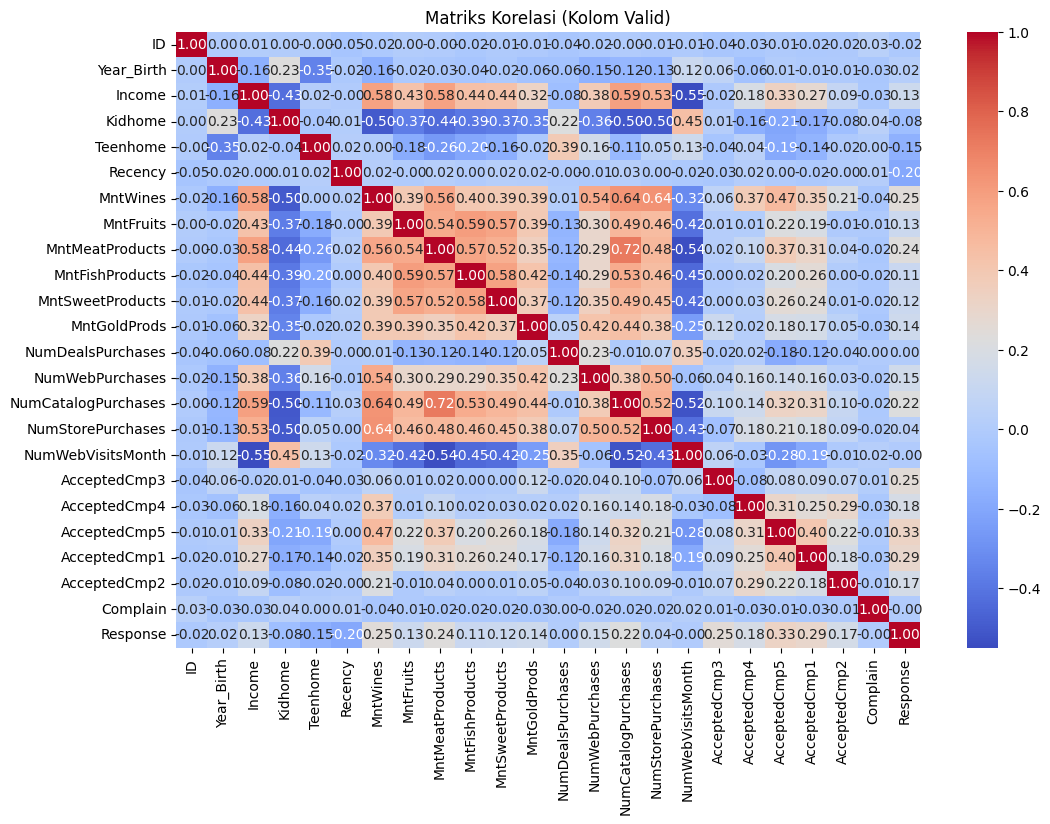

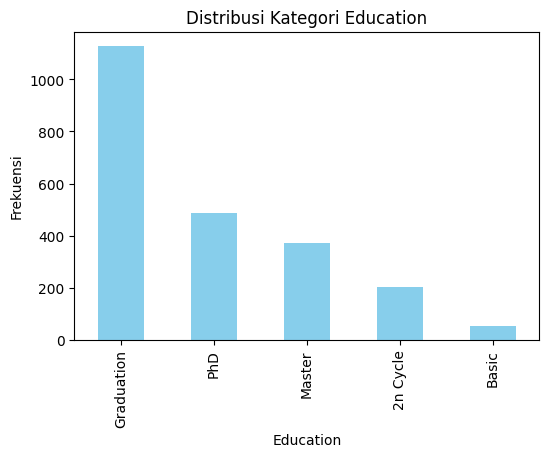

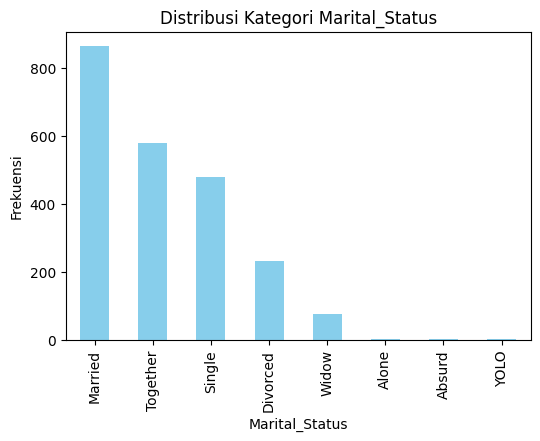


Kolom `Dt_Customer` memiliki terlalu banyak kategori (663). Menampilkan hanya 15 teratas.


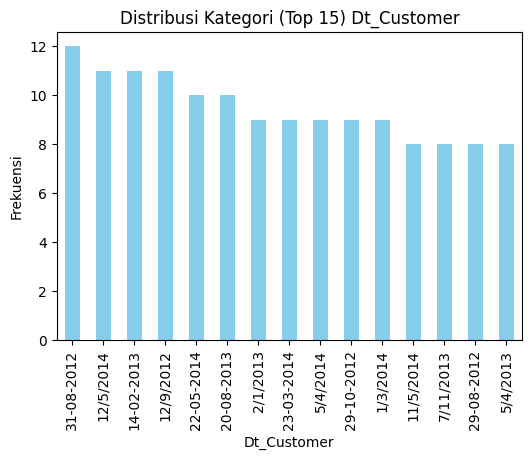

In [334]:
# Informasi dataset
print("\nInformasi Dataset:")
print(df.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(df.shape)
print("\nJenis Data pada Setiap Kolom:")
print(df.dtypes)

df_original = df.copy()

# 2 Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom (Sebelum Penanganan):")
missing_values_before = df.isnull().sum()
print(missing_values_before)

#Menetukan langkah-langkah yang diperlukan untuk menangani data yang hilang
# 1. Mengisi missing values pada kolom 'Income' dengan mean
#saya langsung saja ke kolom yang dituju tanpa iterasi karena hanya 1 kolom yang misssing value
df["Income"] = df["Income"].fillna(df["Income"].mean())

# Menampilkan missing values setelah diisi
print("\nData yang Hilang pada Setiap Kolom (Setelah Penanganan):")
missing_values_after = df.isnull().sum()
print(missing_values_after)

# Mengecek duplikasi dalam dataset
print("\nJumlah Data Duplikat:", df.duplicated().sum())

# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi (saya pilih karena dataset nya cukup besar jadi agar mudah membaca nya dibanding pairplot)
# Filter kolom numerikal
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Menghapus kolom yang seluruh nilainya NaN
valid_numerical_cols = df[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if df[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = df[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")



# 4 Visualisasi Data Kategorikal dengan Batas Maksimal Kategori
max_unique_values = 15  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = df[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = df[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Data yang Hilang pada Setiap Kolom (Setelah Penanganan):
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Jumlah Data Duplikat: 0

Data setelah Normalisasi & Standarisasi:
   Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.985345  0.235327 -0.825218 -0.929894  0.307039  0.98

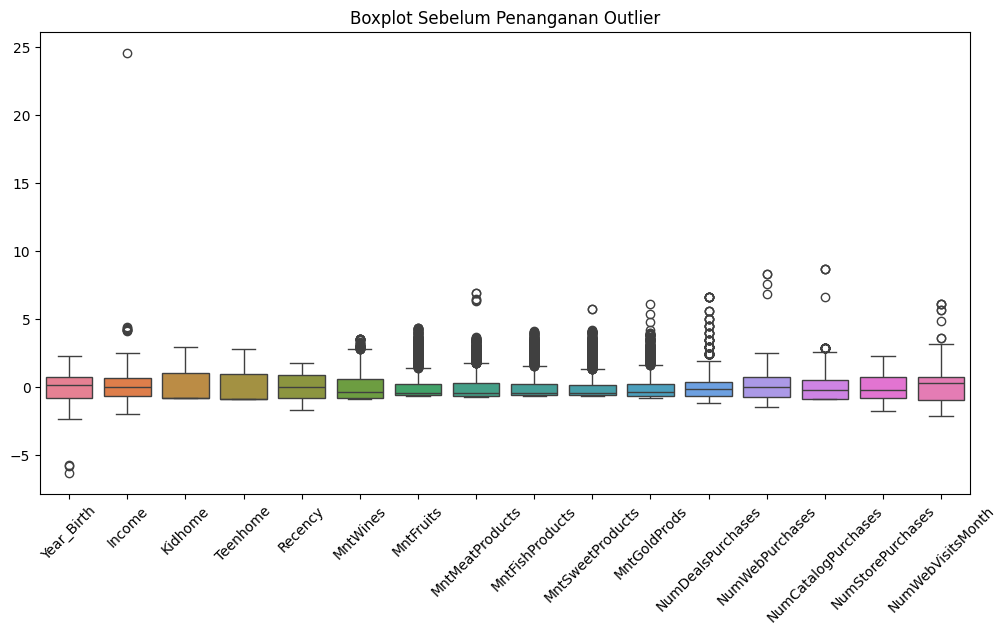


Jumlah Outlier Teridentifikasi: 1249

Outlier telah ditangani menggunakan metode capping.


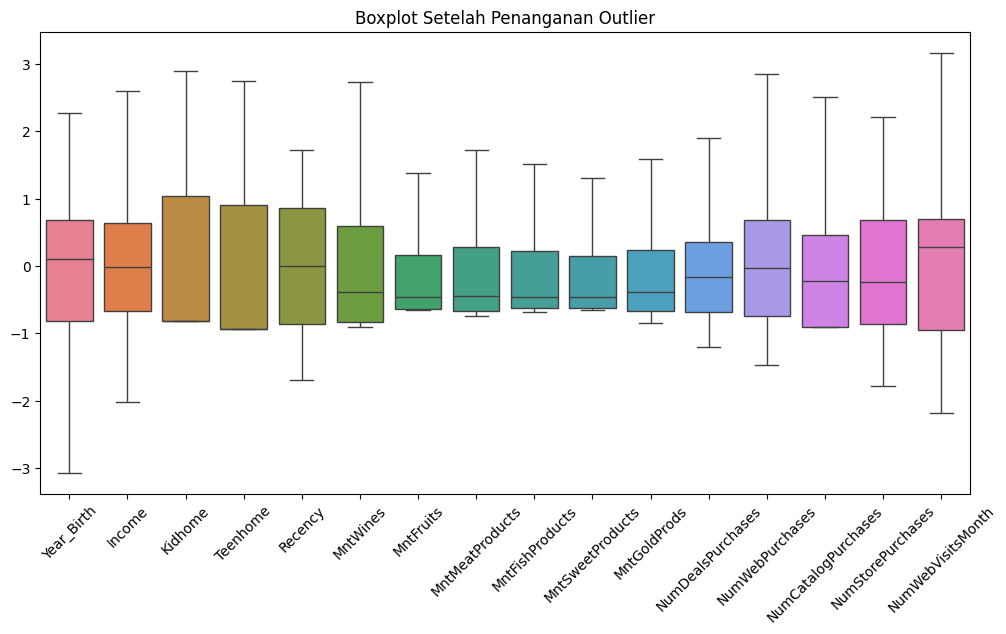

In [335]:
# 1. Menampilkan missing values setelah diisi
print("\nData yang Hilang pada Setiap Kolom (Setelah Penanganan):")
missing_values_after = df.isnull().sum()
print(missing_values_after)

# 2. Mengecek & Menghapus Data Duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())
# Tidak ada data duplikat, jadi tidak perlu penghapusan

# Menghapus Kolom yang Tidak Digunakan
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

#  One-Hot Encoding untuk Education & Marital_Status (Data Kategrikal)
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# 3 Normalisasi atau Standarisasi Fitur
# Daftar fitur biner yang tidak boleh dinormalisasi
binary_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']


# Standarisasi hanya untuk fitur numerik NON-BINER
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in binary_cols]  # Exclude binary columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\nData setelah Normalisasi & Standarisasi:")
print(df[numerical_cols].head())

# 4. Deteksi dan Penanganan Outlier
# A. Visualisasi Outlier Sebelum Penanganan
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Sebelum Penanganan Outlier")
plt.show()

# B. Deteksi Outlier Menggunakan IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek jumlah outlier sebelum capping
outliers = (df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum().sum())

# **Capping: Mengganti nilai outlier dengan batas bawah atau atas**
for col in numerical_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                       np.where(df[col] > upper_bound[col], upper_bound[col], df[col]))

print("\nOutlier telah ditangani menggunakan metode capping.")

# C. Visualisasi Setelah Penanganan Outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Penanganan Outlier")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [336]:
clustering_data = df[numerical_cols]

In [337]:
# Pilih jumlah cluster awal (misalnya, 3)
n_clusters = 3

# Pilih kolom numerikal untuk clustering
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
clustering_data = df[numerical_cols]  # Pastikan ini benar

# Latih model clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data)  # Pindahkan setelah model dibuat

# Tambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster
0,-0.985345,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.375541,1.679702,1.519213,1.306891,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,0,0,0,0,0,0,1,False,True,False,False,False,False,False,True,False,False,False,2
1,-1.235733,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,0,0,0,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,0
2,-0.317643,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,True,False,False,2
3,1.268149,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,True,False,False,0
4,1.017761,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,0,0,0,0,0,0,0,False,False,False,True,False,False,True,False,False,False,False,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah klaster: 2, Silhouette Score: 0.2962799785758417 - Tidak Disimpan
Jumlah klaster: 3, Silhouette Score: 0.24381035110051366 - Tidak Disimpan
Jumlah klaster: 4, Silhouette Score: 0.1761909832154831 - Tidak Disimpan
Jumlah klaster: 5, Silhouette Score: 0.15966527136383354 - Tidak Disimpan
Jumlah klaster: 6, Silhouette Score: 0.15922762431009582 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.1542841266549749 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.138099460931311 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.12692036347230642 - Tidak Disimpan
Jumlah klaster: 10, Silhouette Score: 0.12257783341476995 - Tidak Disimpan


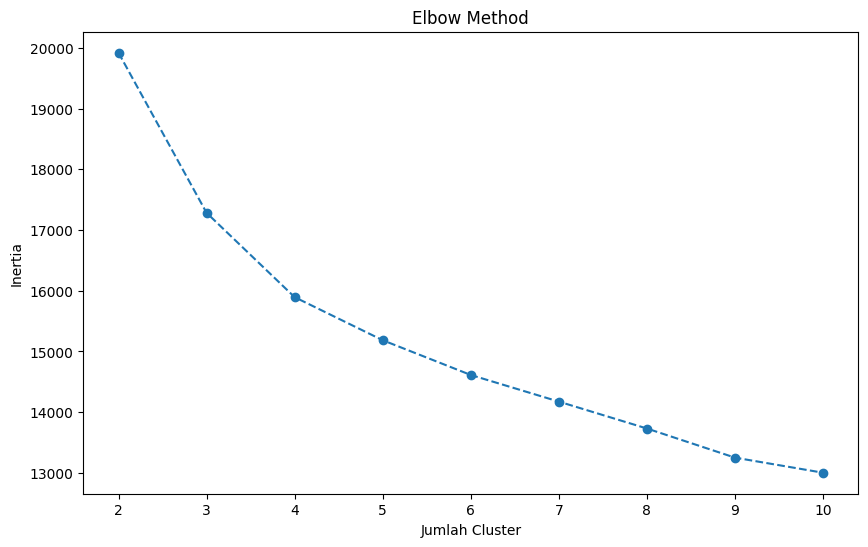

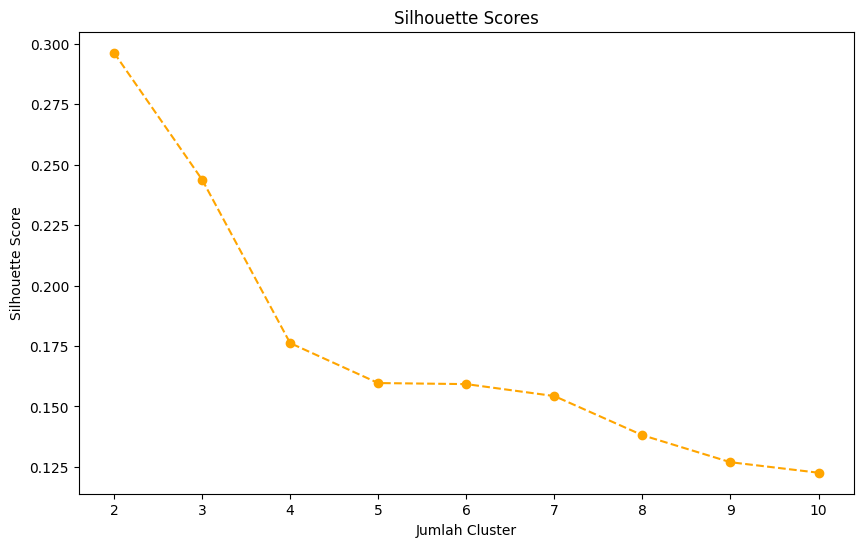


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [338]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)  # Uji jumlah cluster dari 2 hingga 10

# Variabel untuk menyimpan label klaster yang valid
valid_cluster_labels = []

for n_clusters in range_n_clusters:
    # Melakukan klasterisasi KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_data)

    # Menghitung Silhouette Score untuk hasil klasterisasi
    silhouette_avg = silhouette_score(clustering_data, cluster_labels)

    # Simpan inertia (SSE) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung silhouette score
    score = silhouette_score(clustering_data, cluster_labels)
    silhouette_scores.append(score)

    # Jika Silhouette Score >= 0.55, simpan label klaster
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {n_clusters}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Pilih jumlah cluster optimal berdasarkan evaluasi
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 karena range dimulai dari 2
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_n_clusters}")

In [339]:
# Menghitung silhoutte score
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.2962799785758417


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [372]:
# 1. Skala Data
scaler = RobustScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# 2. Optimasi Parameter untuk Feature Agglomeration, SelectKBest, dan PCA
best_silhouette = -1
best_agglo_n = None
best_k = None
best_n_components = None

# Eksperimen dengan berbagai kombinasi parameter
for agglo_n in range(2, min(9, clustering_data_scaled.shape[1] + 1)):  # Menguji n_clusters dari 2 hingga 8 atau maks fitur
    # Feature Agglomeration
    agglo = FeatureAgglomeration(n_clusters=agglo_n)
    clustering_data_agglo = agglo.fit_transform(clustering_data_scaled)

    dummy_target = KMeans(n_clusters=2, random_state=42).fit_predict(clustering_data_agglo)

    # SelectKBest
    for k in range(2, min(5, clustering_data_agglo.shape[1] + 1)):  # Uji k dari 2 hingga 4 atau maks fitur
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
        clustering_data_selected = selector.fit_transform(clustering_data_agglo, dummy_target)

        # PCA
        for n_comp in [1, 2]:  # Uji n_components=1 atau 2
            if clustering_data_selected.shape[1] > n_comp:  # memastikan n_components valid
                pca = PCA(n_components=n_comp)
                clustering_data_pca = pca.fit_transform(clustering_data_selected)

                # Clustering dengan KMeans
                kmeans_after = KMeans(n_clusters=2, n_init=50, random_state=42)
                kmeans_labels = kmeans_after.fit_predict(clustering_data_pca)
                silhouette_after = silhouette_score(clustering_data_pca, kmeans_labels)

                print(f"agglo_n={agglo_n}, k={k}, n_components={n_comp}, Silhouette Score={silhouette_after:.4f}")

                if silhouette_after > best_silhouette:
                    best_silhouette = silhouette_after
                    best_agglo_n = agglo_n
                    best_k = k
                    best_n_components = n_comp

# 3. Hasil Terbaik
print(f"\nKombinasi Terbaik:")
print(f"Feature Agglomeration (n_clusters={best_agglo_n}), SelectKBest (k={best_k}), PCA (n_components={best_n_components})")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

agglo_n=2, k=2, n_components=1, Silhouette Score=0.6949
agglo_n=3, k=2, n_components=1, Silhouette Score=0.7106
agglo_n=3, k=3, n_components=1, Silhouette Score=0.7116
agglo_n=3, k=3, n_components=2, Silhouette Score=0.6343
agglo_n=4, k=2, n_components=1, Silhouette Score=0.7106
agglo_n=4, k=3, n_components=1, Silhouette Score=0.7230
agglo_n=4, k=3, n_components=2, Silhouette Score=0.6068
agglo_n=4, k=4, n_components=1, Silhouette Score=0.7229
agglo_n=4, k=4, n_components=2, Silhouette Score=0.6069
agglo_n=5, k=2, n_components=1, Silhouette Score=0.7106
agglo_n=5, k=3, n_components=1, Silhouette Score=0.7320
agglo_n=5, k=3, n_components=2, Silhouette Score=0.5647
agglo_n=5, k=4, n_components=1, Silhouette Score=0.7243
agglo_n=5, k=4, n_components=2, Silhouette Score=0.5619
agglo_n=6, k=2, n_components=1, Silhouette Score=0.7150
agglo_n=6, k=3, n_components=1, Silhouette Score=0.6815
agglo_n=6, k=3, n_components=2, Silhouette Score=0.5738
agglo_n=6, k=4, n_components=1, Silhouette Score

In [375]:
# Hasil Perbandingan
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original:.4f}")
print(f"Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: {best_silhouette:.4f}")

# Perubahan skor
print("\nPerbandingan Performa:")
print(f"Perubahan: {best_silhouette - silhouette_score_original:.4f}")

Silhouette Score Tanpa Feature Selection: 0.2963
Silhouette Score dengan Feature Agglomeration + SelectKBest + PCA: 0.7320

Perbandingan Performa:
Perubahan: 0.4357


**Penjelasan :**

Untuk submission ini saya sudah mencoba untuk menggunakan RFE, PCA,Variance Threshold & Korelasi,RFE + PCA, Feature Importance dari RandomForest, dan mencoba mengganti metode dengan menggunakan Agglomerative Clustering, DBSCAN, PCA+SelcetKBest

Dan didapatkan bahwa dengan melakukan Feature Agglomeration + SelectKBest + PCA 

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [342]:
print("Kolom dalam Dataset:")
print(df.columns)

Kolom dalam Dataset:
Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster'],
      dtype='object')


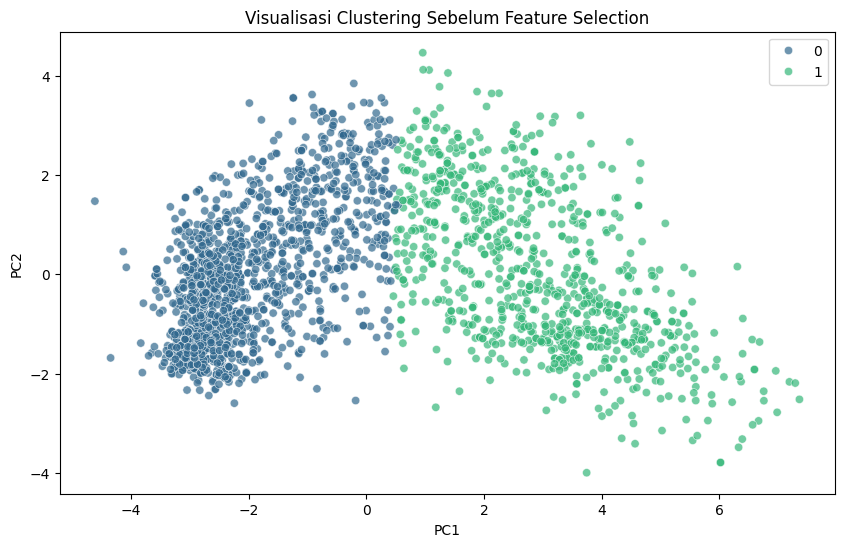

In [376]:
# Standarisasi data sebelum PCA
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
clustering_data_pca = pca.fit_transform(clustering_data_scaled)

# Lakukan clustering dengan K-Means
optimal_n_clusters = 2
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_data_scaled)

# Plot hasil clustering sebelum feature selection
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_data_pca[:, 0], y=clustering_data_pca[:, 1], hue=cluster_labels, palette="viridis", alpha=0.7)
plt.title("Visualisasi Clustering Sebelum Feature Selection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


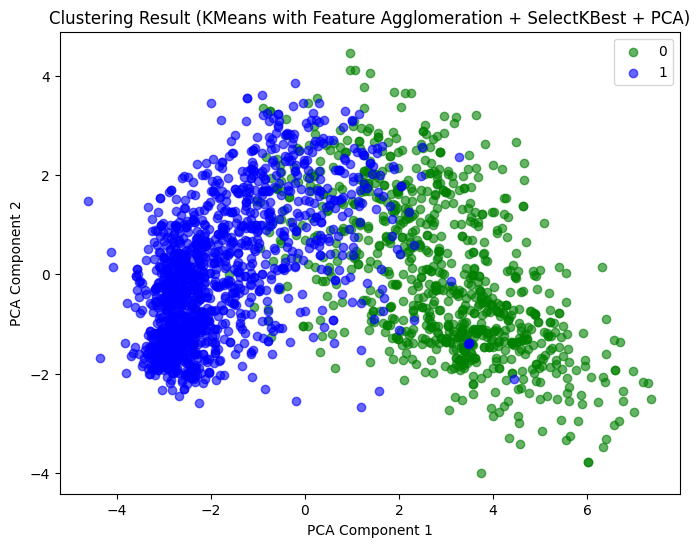

In [382]:
plt.figure(figsize=(8, 6))
plt.scatter(clustering_data_pca[kmeans_labels == 0, 0], clustering_data_pca[kmeans_labels == 0, 1],
            c='green', label='0', alpha=0.6)
plt.scatter(clustering_data_pca[kmeans_labels == 1, 0], clustering_data_pca[kmeans_labels == 1, 1],
            c='blue', label='1', alpha=0.6)

# Add legend and labels
plt.legend()
plt.title("Clustering Result (KMeans with Feature Agglomeration + SelectKBest + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
cluster_labels_selected = kmeans_after.fit_predict(clustering_data_pca)
df['cluster'] = cluster_labels_selected


In [346]:
# Definisikan kembali scaler yang digunakan sebelumnya
scaler = StandardScaler()
scaler.fit(df_original[numerical_cols])  # Fit scaler pada data asli sebelum transformasi

# Ambil data numerik yang telah distandarisasi
numerical_data_scaled = df[numerical_cols].values



### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [347]:
# Inverse Transform untuk fitur numerik
numerical_data_unscaled = scaler.inverse_transform(df[numerical_cols])

# Buat DataFrame baru dengan data yang telah di-inverse
df_unscaled = pd.DataFrame(numerical_data_unscaled, columns=numerical_cols, index=df.index)

# Tambahkan label cluster ke DataFrame yang telah di-unscale
df_unscaled['cluster'] = df['cluster']

In [348]:
# Education
education_cols = [col for col in df.columns if 'Education_' in col]
if education_cols:  # Pastikan kolom ada sebelum mencoba rekonstruksi
    df_unscaled['Education'] = df[education_cols].apply(lambda row: row.idxmax(), axis=1).str.replace('Education_', '').fillna("Unknown")

# Marital_Status
marital_cols = [col for col in df.columns if 'Marital_Status_' in col]
if marital_cols:  # Pastikan kolom ada sebelum mencoba rekonstruksi
    df_unscaled['Marital_Status'] = df[marital_cols].apply(lambda row: row.idxmax(), axis=1).str.replace('Marital_Status_', '').fillna("Unknown")


In [349]:

# Mengatur agar seluruh kolom ditampilkan
pd.set_option('display.max_columns', None)

df_interpreted = df_original.copy()

# Tambahkan kembali data numerik yang telah dikembalikan ke skala asli
df_interpreted[numerical_cols] = df_unscaled[numerical_cols]

# Tambahkan kembali fitur kategorikal yang telah direkonstruksi
df_interpreted['Education'] = df_unscaled['Education']
df_interpreted['Marital_Status'] = df_unscaled['Marital_Status']

# Tambahkan kembali label cluster
df_interpreted['cluster'] = df_unscaled['cluster']

# Tampilkan hasil akhir untuk verifikasi
print("\nDataFrame setelah Inverse Transform:")
print(df_interpreted.head())


DataFrame setelah Inverse Transform:
     ID  Year_Birth   Education Marital_Status        Income  Kidhome  \
0  5524      1957.0  Graduation         Single  58169.813455      0.0   
1  2174      1954.0  Graduation         Single  46312.119023      1.0   
2  4141      1965.0  Graduation       Together  71717.586262      0.0   
3  6182      1984.0  Graduation       Together  26507.738411      1.0   
4  5324      1981.0         PhD        Married  58325.650545      1.0   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0       0.0    4/9/2012     58.0     635.0       81.0            546.0   
1       1.0    8/3/2014     38.0      11.0        1.0              6.0   
2       0.0  21-08-2013     26.0     426.0       49.0            127.0   
3       0.0   10/2/2014     26.0      11.0        4.0             20.0   
4       0.0  19-01-2014     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0    

In [350]:
#kode ini agar data nya menjadi sesuai tipe data

# Konversi tipe data sesuai dengan jenis yang seharusnya
int_cols = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
            'Z_Revenue', 'Response', 'cluster']

# Ubah kolom numerik ke integer
df_interpreted[int_cols] = df_interpreted[int_cols].round().astype(int)

# Pastikan kolom 'Income' tetap float
df_interpreted['Income'] = df_interpreted['Income'].astype(float)

# Pastikan 'Dt_Customer' tetap sebagai string
df_interpreted['Dt_Customer'] = df_original['Dt_Customer'].astype(str)

print("\nJenis Data pada Setiap Kolom setelah Konversi:")
print(df_interpreted.dtypes)

print("\nDataFrame setelah Inverse Transform:")
print(df_interpreted.head())


Jenis Data pada Setiap Kolom setelah Konversi:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
cluster                  int64
dtype: object

DataFra

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

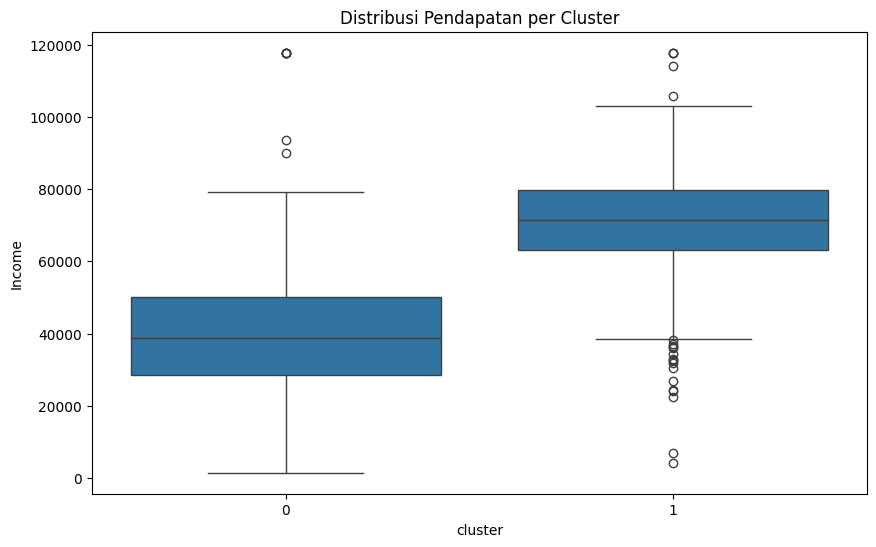

Distribusi Pengeluaran untuk Wines per Cluster:
MntWines_Category  Rendah  Sedang  Tinggi
cluster                                  
0                     920     340      96
1                      32     383     469


<Figure size 1000x600 with 0 Axes>

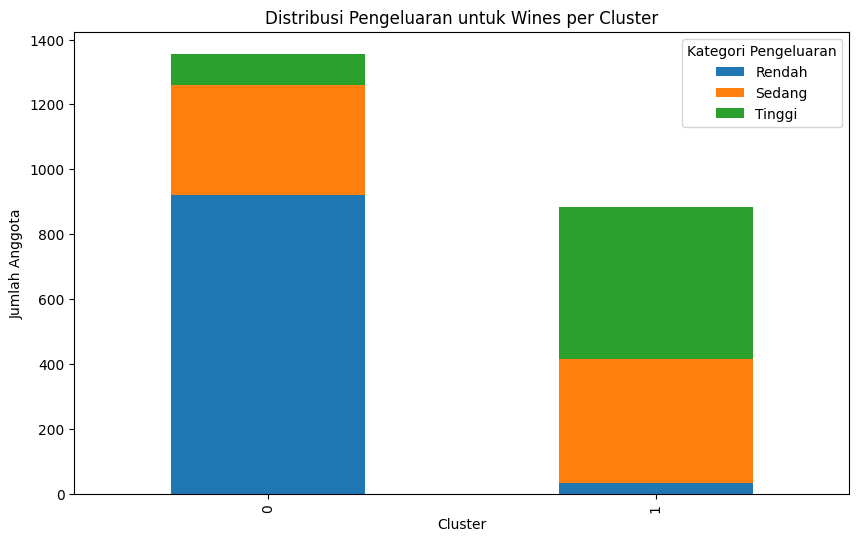


Distribusi Pengeluaran untuk Meat Products per Cluster:
MntMeatProducts_Category  Rendah  Sedang  Tinggi
cluster                                         
0                            988     339      29
1                             22     262     600


<Figure size 1000x600 with 0 Axes>

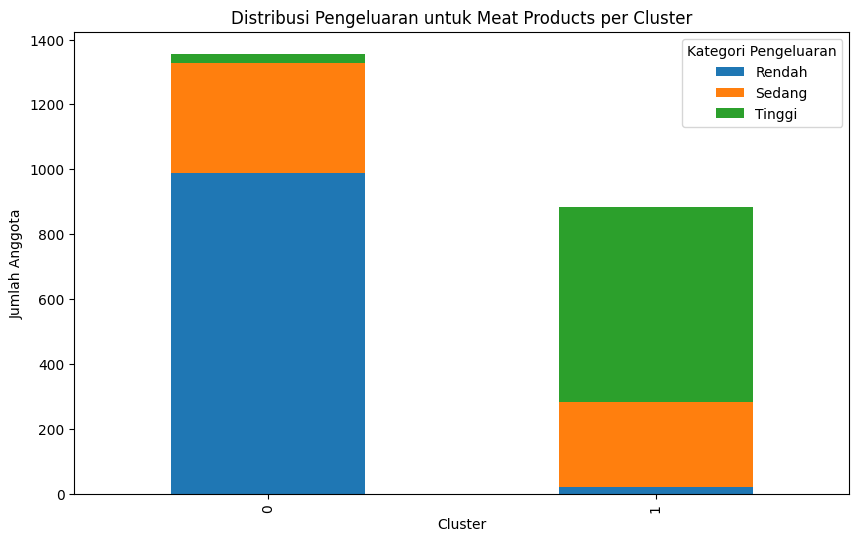


Distribusi Pengeluaran untuk Fruits per Cluster:
MntFruits_Category  Rendah  Sedang  Tinggi
cluster                                   
0                   1272.0    84.0     0.0
1                    211.0   440.0   233.0


<Figure size 1000x600 with 0 Axes>

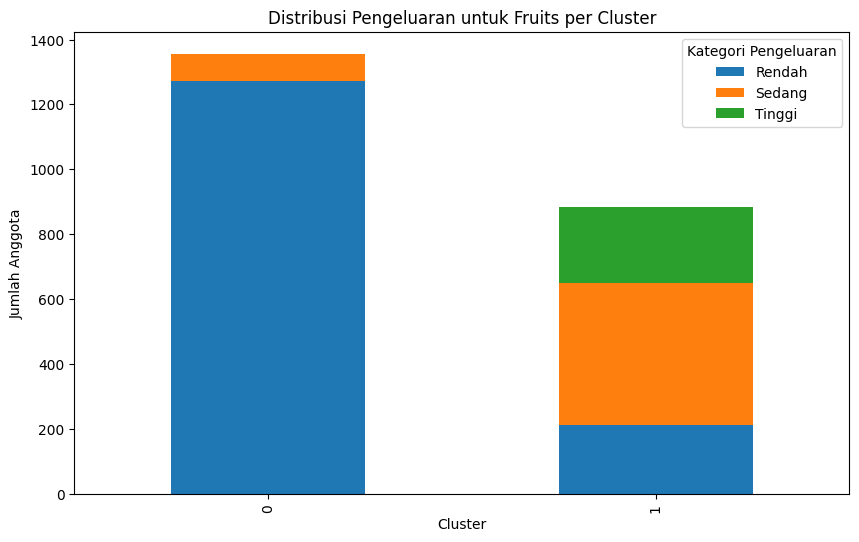


Distribusi Pendidikan per Cluster:
Education  Basic  Graduation  Master  PhD
cluster                                  
0            178         642     238  298
1             79         485     132  188


<Figure size 1000x600 with 0 Axes>

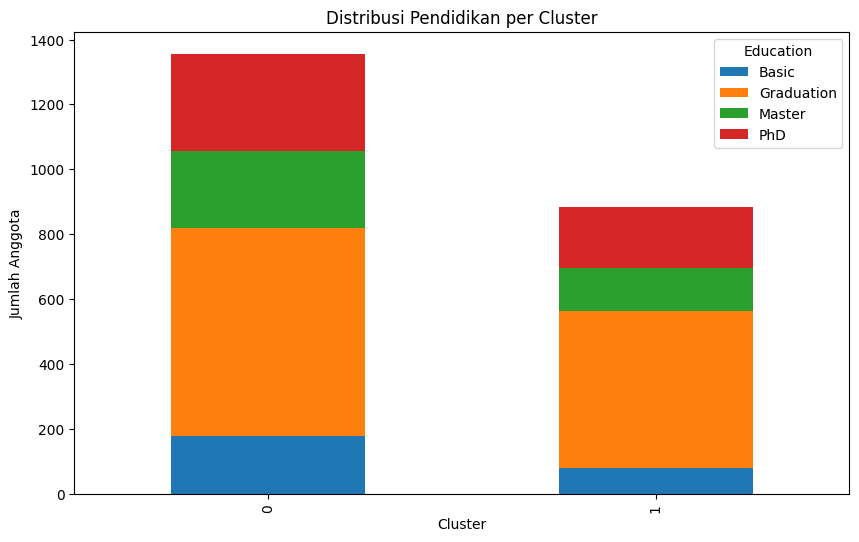


Distribusi Status Pernikahan per Cluster:
Marital_Status  Alone  Divorced  Married  Single  Together  Widow  YOLO
cluster                                                                
0                 3.0     139.0    530.0   288.0     355.0   39.0   2.0
1                 2.0      93.0    334.0   192.0     225.0   38.0   0.0


<Figure size 1000x600 with 0 Axes>

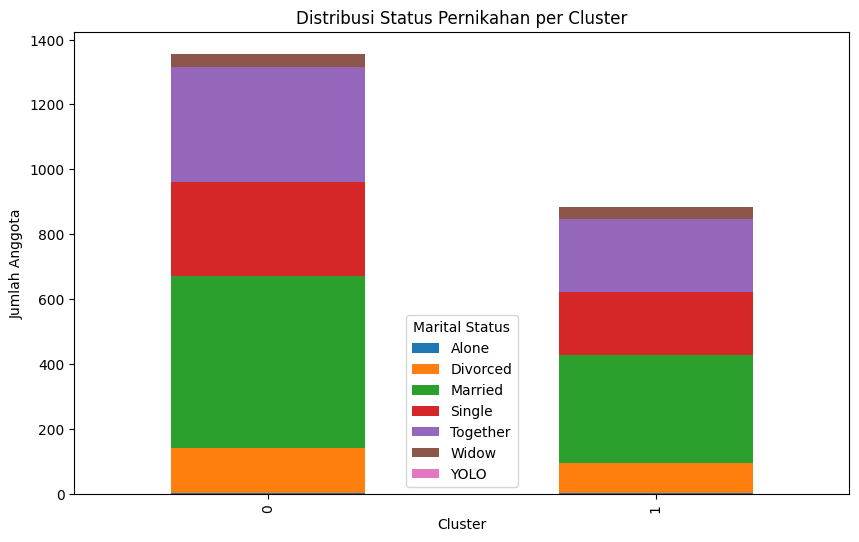

In [351]:
# Boxplot untuk melihat distribusi pendapatan per cluster (kode awal Anda)
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Income', data=df_interpreted)
plt.title("Distribusi Pendapatan per Cluster")
plt.show()

# 1. Distribusi pengeluaran produk per cluster (menggunakan pendekatan seperti pendidikan)
# mengelompokkan pengeluaran ke dalam kategori (misalnya: rendah, sedang, tinggi)
def categorize_expense(value, col_name):
    if col_name == 'MntWines':
        if value <= 100:
            return 'Rendah'
        elif value <= 500:
            return 'Sedang'
        else:
            return 'Tinggi'
    elif col_name == 'MntMeatProducts':
        if value <= 50:
            return 'Rendah'
        elif value <= 200:
            return 'Sedang'
        else:
            return 'Tinggi'
    elif col_name == 'MntFruits':
        if value <= 20:
            return 'Rendah'
        elif value <= 80:
            return 'Sedang'
        else:
            return 'Tinggi'

# Terapkan kategorisasi pada kolom pengeluaran
df_interpreted['MntWines_Category'] = df_interpreted['MntWines'].apply(lambda x: categorize_expense(x, 'MntWines'))
df_interpreted['MntMeatProducts_Category'] = df_interpreted['MntMeatProducts'].apply(lambda x: categorize_expense(x, 'MntMeatProducts'))
df_interpreted['MntFruits_Category'] = df_interpreted['MntFruits'].apply(lambda x: categorize_expense(x, 'MntFruits'))

# Distribusi MntWines per cluster
print("Distribusi Pengeluaran untuk Wines per Cluster:")
wines_dist = df_interpreted.groupby(['cluster', 'MntWines_Category']).size().unstack().fillna(0)
print(wines_dist)

plt.figure(figsize=(10, 6))
wines_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Pengeluaran untuk Wines per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Kategori Pengeluaran")
plt.show()

# Distribusi MntMeatProducts per cluster
print("\nDistribusi Pengeluaran untuk Meat Products per Cluster:")
meat_dist = df_interpreted.groupby(['cluster', 'MntMeatProducts_Category']).size().unstack().fillna(0)
print(meat_dist)

plt.figure(figsize=(10, 6))
meat_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Pengeluaran untuk Meat Products per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Kategori Pengeluaran")
plt.show()

# Distribusi MntFruits per cluster
print("\nDistribusi Pengeluaran untuk Fruits per Cluster:")
fruits_dist = df_interpreted.groupby(['cluster', 'MntFruits_Category']).size().unstack().fillna(0)
print(fruits_dist)

plt.figure(figsize=(10, 6))
fruits_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Pengeluaran untuk Fruits per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Kategori Pengeluaran")
plt.show()

# 2. Analisis Pendidikan dominan (Graduation) per cluster
print("\nDistribusi Pendidikan per Cluster:")
education_dist = df_interpreted.groupby(['cluster', 'Education']).size().unstack().fillna(0)
print(education_dist)

# Visualisasi distribusi pendidikan
plt.figure(figsize=(10, 6))
education_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Pendidikan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Education")
plt.show()

# 3. Analisis Status Pernikahan dominan (Married) per cluster
print("\nDistribusi Status Pernikahan per Cluster:")
marital_dist = df_interpreted.groupby(['cluster', 'Marital_Status']).size().unstack().fillna(0)
print(marital_dist)

# Visualisasi distribusi status pernikahan
plt.figure(figsize=(10, 6))
marital_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Status Pernikahan per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.legend(title="Marital Status")
plt.show()

**Insight**

Grafik-grafik tersebut memberikan gambaran distribusi karakteristik anggota dalam dua klaster. Klaster 0 memiliki pendapatan yang lebih rendah (sekitar 40.000) dibandingkan Klaster 1 (sekitar 70.000), dengan beberapa outlier di atas 100.000 di kedua klaster. Untuk pengeluaran, Klaster 0 didominasi oleh anggota dengan pengeluaran rendah pada wines, meat products, dan fruits, sedangkan Klaster 1 memiliki proporsi yang lebih besar pada pengeluaran tinggi, terutama untuk meat products. Dari segi pendidikan, kedua klaster didominasi oleh anggota dengan tingkat pendidikan "Graduation", meskipun Klaster 0 memiliki lebih banyak anggota secara keseluruhan. Status pernikahan menunjukkan bahwa "Married" adalah kategori dominan di kedua klaster, dengan Klaster 0 memiliki lebih banyak anggota yang menikah dibandingkan Klaster 1, yang juga memiliki proporsi "Single" yang lebih tinggi. Secara keseluruhan, Klaster 1 tampaknya mewakili kelompok dengan pendapatan dan pengeluaran lebih tinggi, sementara Klaster 0 lebih besar namun dengan karakteristik ekonomi yang lebih rendah.

<ipython-input-352-eaaebf5eeacc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


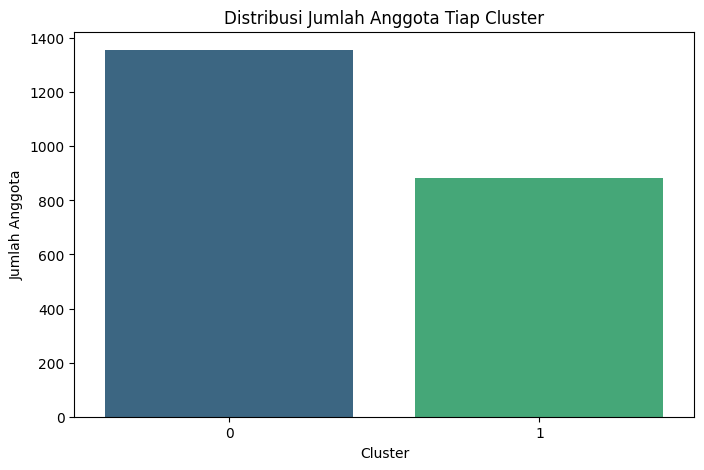

In [352]:
# Hitung jumlah anggota per cluster
cluster_counts = df_interpreted['cluster'].value_counts().sort_index()

# Visualisasi distribusi cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Anggota")
plt.title("Distribusi Jumlah Anggota Tiap Cluster")
plt.show()

**Insight**
Grafik bar plot ini menunjukkan distribusi jumlah anggota dalam dua klaster, di mana Klaster 0 memiliki sekitar 1400 anggota dan Klaster 1 sekitar 900 anggota, mengindikasikan ketidakseimbangan dengan Klaster 0 sebagai kelompok yang lebih besar. Hal ini dapat mencerminkan kecenderungan data yang lebih banyak berkumpul pada karakteristik Klaster 0, yang mungkin mewakili segmen dominan, sementara Klaster 1 adalah kelompok yang lebih kecil atau spesifik. Untuk analisis lebih lanjut, ketidakseimbangan ini bisa menjadi dasar untuk strategi segmentasi atau penyesuaian metode clustering

In [353]:
# Statistik deskriptif per cluster
numerical_summary = df_interpreted.groupby("cluster")[numerical_cols].describe()
print(numerical_summary)


        Year_Birth                                                          \
             count         mean        std     min     25%     50%     75%   
cluster                                                                      
0           1356.0  1969.814897  11.182371  1932.0  1962.0  1971.0  1978.0   
1            884.0  1967.375566  12.485340  1932.0  1957.0  1968.0  1977.0   

                 Income                                           \
            max   count          mean           std          min   
cluster                                                            
0        1996.0  1356.0  39550.624606  15283.440297  1457.177577   
1        1995.0   884.0  70775.100285  13196.839078  4169.748340   

                                                                 Kidhome  \
                  25%           50%           75%            max   count   
cluster                                                                    
0        28625.614732  38753.517467  501

In [354]:
# Agregasi Numerik
numeric_agg = df_interpreted.groupby('cluster').agg({
    'Income': ['min', 'max', 'mean'],
    'MntWines': ['min', 'max', 'mean'],
    'MntMeatProducts': ['min', 'max', 'mean'],
    'MntFruits': ['min', 'max', 'mean']
}).reset_index()

# Konversi tipe data agar sesuai dengan tipe aslinya
for col in ['Income', 'MntWines', 'MntMeatProducts', 'MntFruits']:
    numeric_agg[(col, 'min')] = numeric_agg[(col, 'min')].astype(int)
    numeric_agg[(col, 'max')] = numeric_agg[(col, 'max')].astype(int)
    numeric_agg[(col, 'mean')] = numeric_agg[(col, 'mean')].round(2)  # Biarkan mean tetap float dengan 2 desimal

# Agregasi Kategorikal (modus)
categorical_agg = df_interpreted.groupby('cluster').agg({
    'Education': lambda x: x.mode()[0],
    'Marital_Status': lambda x: x.mode()[0]
}).reset_index()

# Tampilkan hasil agregasi
print("Agregasi Numerik per Cluster:")
print(numeric_agg)

print("\nAgregasi Kategorikal per Cluster:")
print(categorical_agg)


Agregasi Numerik per Cluster:
  cluster Income                   MntWines               MntMeatProducts  \
             min     max      mean      min   max    mean             min   
0       0   1457  117768  39550.62        0  1225  129.81               0   
1       1   4169  117768  70775.10        1  1225  566.42               3   

               MntFruits             
   max    mean       min max   mean  
0  556   40.47         0  70   6.08  
1  556  320.23         0  81  45.61  

Agregasi Kategorikal per Cluster:
   cluster   Education Marital_Status
0        0  Graduation        Married
1        1  Graduation        Married


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Pendapatan (Income):**
  - Minimum: 1.457
  - Maksimum: 117.768
  - Rata-rata: 39.550,62
- **Pengeluaran untuk Produk (MntWines, MntMeatProducts, MntFruits):**
  - Rata-rata pengeluaran untuk Wine: 129,81
  - Rata-rata pengeluaran untuk  Daging: 40,47
  - Rata-rata pengeluaran untuk untuk Buah: 6,08
- **Karakteristik Kategorikal:**
  - Pendidikan dominan: Graduation
  - Status pernikahan dominan: Married

- **Analisis:** Cluster 0 terdiri dari pelanggan dengan rentang pendapatan yang cukup luas, tetapi dengan rata-rata yang lebih rendah dibandingkan Cluster 1. Hal ini menunjukkan bahwa mayoritas pelanggan dalam kelompok ini memiliki daya beli yang lebih terbatas.

  Dari sisi pengeluaran, pelanggan dalam cluster ini cenderung membelanjakan lebih sedikit untuk produk seperti Wine, Daging, dan Buah. Rata-rata pengeluaran yang lebih rendah menunjukkan bahwa mereka lebih hemat atau lebih selektif dalam pembelian.

  Dari segi demografi, mayoritas pelanggan dalam cluster ini memiliki tingkat pendidikan Graduation dan berstatus menikah. Ini menunjukkan bahwa mereka kemungkinan besar merupakan keluarga yang mengelola keuangan mereka dengan lebih hati-hati.

  **Strategi yang bisa diterapkan:**
  1. Menawarkan program diskon atau paket hemat untuk meningkatkan keterlibatan pelanggan.
  2. Mengembangkan kampanye pemasaran yang menyoroti nilai ekonomis dan manfaat produk.
  3. Menggunakan strategi pemasaran berbasis edukasi untuk meningkatkan minat pelanggan terhadap produk yang lebih premium secara bertahap

## Cluster 1:
- **Pendapatan (Income):**
  - Minimum: 4.169
  - Maksimum: 117.768
  - Rata-rata: 70.775,10
- **Pengeluaran untuk Produk (MntWines, MntMeatProducts, MntFruits):**
  - Rata-rata pengeluaran untuk Wine: 566,42
  - Rata-rata pengeluaran untuk Daging: 320,23
  - Rata-rata pengeluaran untuk Buah:  45,61
- **Karakteristik Kategorikal:**
  - Pendidikan dominan: Graduation
  - Status pernikahan dominan: Married
- **Analisis:** Cluster 1 mencerminkan kelompok pelanggan dengan daya beli yang lebih tinggi dan kecenderungan belanja yang lebih konsumtif. Rata-rata pengeluaran yang jauh lebih besar dibandingkan Cluster 0 menunjukkan bahwa mereka memiliki preferensi terhadap produk berkualitas tinggi atau dalam jumlah yang lebih besar

 Meskipun karakteristik demografi utama masih sama dengan Cluster 0, perbedaan mencolok terlihat pada pola konsumsi dan gaya hidup yang lebih konsumtif. Hal ini bisa terkait dengan profesi atau gaya hidup yang memungkinkan mereka untuk membelanjakan lebih banyak pada kategori produk tertentu.

  
  **Strategi yang bisa diterapkan:**

  1. Karena pelanggan dalam cluster ini memiliki tingkat konsumsi yang lebih tinggi, strategi pemasaran yang efektif bisa berupa program loyalitas atau paket bundling untuk meningkatkan nilai transaksi mereka.
  2. Penawaran eksklusif atau pemasaran berbasis segmentasi produk premium dapat lebih efektif untuk menarik pelanggan dari kelompok ini.
  3. Menyediakan pengalaman belanja yang lebih personal melalui rekomendasi berbasis data konsumsi pelanggan.
  4. Menawarkan akses ke acara eksklusif atau membership premium bagi pelanggan setia.



  **KESIMPULAN**
  
  Berdasarkan hasil clustering menggunakan metode K-Means, pelanggan dapat dikelompokkan ke dalam dua kategori utama dengan karakteristik yang berbeda:

  Cluster 0: Pelanggan dengan daya beli lebih rendah, cenderung hemat dalam pengeluaran, dan lebih memilih produk dengan harga yang lebih terjangkau.

  Cluster 1: Pelanggan dengan pendapatan lebih tinggi, menunjukkan pola konsumsi yang lebih besar, serta memiliki preferensi terhadap produk premium atau dalam jumlah lebih besar.

  Perbedaan daya beli dan kebiasaan belanja ini memberikan wawasan penting bagi strategi pemasaran. Dengan segmentasi pelanggan yang lebih jelas, perusahaan dapat merancang kampanye pemasaran yang lebih relevan dan efektif guna meningkatkan keterlibatan serta loyalitas pelanggan.

  Untuk implementasi lebih lanjut, analisis lebih mendalam dapat dilakukan dengan mempertimbangkan faktor-faktor tambahan seperti preferensi produk spesifik, saluran pemasaran yang paling efektif, serta pola pembelian berdasarkan musim atau periode tertentu. Hal ini akan membantu perusahaan dalam menyesuaikan strategi yang lebih presisi untuk masing-masing segmen pelanggan.





# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [355]:


# Simpan dataset setelah konversi tipe data
output_file_inverse = 'marketing_campaign_Cluster.csv'
df_interpreted.to_csv(output_file_inverse, index=False)
print(f"Dataset setelah inverse transform disimpan ke: {output_file_inverse}")



Dataset setelah inverse transform disimpan ke: marketing_campaign_Cluster.csv
